In [116]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay,classification_report, accuracy_score, roc_curve, auc, precision_recall_curve

def sigmoid(x): return 1./(1. +  np.exp(-x))

# Data loading

## Geological map

In [4]:
geol = gpd.read_file("Fichiers Massif Armoricain/geol50_MA2015.shp")

In [5]:
geol[['GSIMPV3', 'geometry']].rename(columns={'GSIMPV3': 'formation_geologique', 'geometry':'coordonnées_géographiques'})

formation_geologique                          coordonnées_géographiques
0                    ALBT4  POLYGON ((129526.868 6831316.400, 129499.913 6...
1                    ALBT4  POLYGON ((128980.447 6831353.169, 129214.575 6...
2                    ALBT4  POLYGON ((127268.779 6831616.962, 127139.306 6...
3                    ALBT4  POLYGON ((130380.416 6832331.916, 130375.675 6...
4                    ALBT4  POLYGON ((130342.117 6832667.002, 130343.638 6...
...                    ...                                                ...
78270                    X  POLYGON ((228270.135 6876784.832, 228254.103 6...
78271                    X  POLYGON ((224602.054 6876863.813, 224596.910 6...
78272                    X  POLYGON ((224943.188 6876855.718, 224936.364 6...
78273                    X  POLYGON ((226520.844 6876666.884, 226641.701 6...
78274                    X  POLYGON ((240330.133 6877439.996, 240320.101 6...

[78275 rows x 2 columns]

In [6]:
geol['WoE_Sb'] = geol.WoE_Sb.fillna(0)

In [7]:
geol

GSIMPV3      Area  WoE_Sb  PC_real  \
0       ALBT4  0.012019     0.0      NaN   
1       ALBT4  0.019771     0.0      NaN   
2       ALBT4  0.050730     0.0      NaN   
3       ALBT4  0.023100     0.0      NaN   
4       ALBT4  0.006497     0.0      NaN   
...       ...       ...     ...      ...   
78270       X  0.015774     0.0      NaN   
78271       X  0.004592     0.0      NaN   
78272       X  0.012354     0.0      NaN   
78273       X  0.140290     0.0      NaN   
78274       X  0.016989     0.0      NaN   

                                                geometry  
0      POLYGON ((129526.868 6831316.400, 129499.913 6...  
1      POLYGON ((128980.447 6831353.169, 129214.575 6...  
2      POLYGON ((127268.779 6831616.962, 127139.306 6...  
3      POLYGON ((130380.416 6832331.916, 130375.675 6...  
4      POLYGON ((130342.117 6832667.002, 130343.638 6...  
...                                                  ...  
78270  POLYGON ((228270.135 6876784.832, 228254.103 6...  
78271  POLYGON ((224602.054 6876863.813, 224596.910 6...  
78272  POLYGON ((224943.188 6876855.718, 224936.364 6...  
78273  POLYGON ((226520.844 6876666.884, 226641.701 6...  
78274  POLYGON ((240330.133 6877439.996, 240320.101 6...  

[78275 rows x 5 columns]

## Antimony occurrences

In [8]:
sb = gpd.read_file("Fichiers Massif Armoricain/Occurences_Sb_MA_ESPG2154.shp")

In [9]:
sb

OBJECTID_1  OBJECTID         ID                       NOM  LONGITUDE  \
0            16        64  FRA-01759  Saint Aubin des Ch�teaux  -1.491667   
1            20       118  FRA-04377               Les Touches  -1.439997   
2            31      3224        NaN                       NaN   0.000000   
3            32      3221        NaN                       NaN   0.000000   
4            33      3214        NaN                       NaN   0.000000   
..          ...       ...        ...                       ...        ...   
136         165     12111        NaN                       NaN   0.000000   
137         166       397        NaN                       NaN   0.000000   
138         167     14743        NaN                       NaN   0.000000   
139         168       836        NaN                       NaN   0.000000   
140         169       663        NaN                       NaN   0.000000   

      LATITUDE SUBSTANCE SUBSTANC_1  POTENTIEL CLASSE  ...  \
0    47.714722        Au         Sb        0.0    NaN  ...   
1    47.878063        Sb         Sb    11484.0      C  ...   
2     0.000000       NaN        NaN        0.0    NaN  ...   
3     0.000000       NaN        NaN        0.0    NaN  ...   
4     0.000000       NaN        NaN        0.0    NaN  ...   
..         ...       ...        ...        ...    ...  ...   
136   0.000000       NaN        NaN        0.0    NaN  ...   
137   0.000000       NaN        NaN        0.0    NaN  ...   
138   0.000000       NaN        NaN        0.0    NaN  ...   
139   0.000000       NaN        NaN        0.0    NaN  ...   
140   0.000000       NaN        NaN        0.0    NaN  ...   

                                        GANGUE  \
0                                          NaN   
1                                          NaN   
2                                      QUARTZ.   
3                                      QUARTZ.   
4                                      QUARTZ.   
..                                         ...   
136                                        NaN   
137                                    QUARTZ.   
138                                        NaN   
139                                    QUARTZ.   
140  QUARTZ,AMPHIBOLE,CHLORITE,EPIDOTE,GRENAT.   

                                            PARAGENESE  \
0                                                  NaN   
1                                                  NaN   
2    BRT,STIBINE,BERTHIERITE,PYRITE,MISPICKEL,LIMON...   
3                                   MISPICKEL,STIBINE.   
4                                             STIBINE.   
..                                                 ...   
136                                                NaN   
137             GALENE,STIBINE,CHALCOPYRITE,CARBONATE.   
138                                                NaN   
139                   BERTHIERITE,MELNICOVITE,STIBINE.   
140         HEMATITE,MAGNETITE,PYRITE,RUTILE,TITANITE.   

                                              CONTEXTE  \
0                                                  NaN   
1                                                  NaN   
2                                        SCHISTES,GRES   
3                                    HORST DES ESSARTS   
4    HORST DES ESSARTS : MICASCHISTES,GNEISS,AMPHIB...   
..                                                 ...   
136                                MAFIC OR ULTRAMAFIC   
137                              CALCAIRE DE LA MAUFFE   
138                                  BASE METALS VEINS   
139                  FILON DE QUARTZ DANS MICASCHISTES   
140  TUF KERATOPHYRIQUE DE LOCQUIREC,SCHISTES DE PL...   

                                            OBSERVATIO  \
0                                                  NaN   
1                                                  NaN   
2    STRUCTURE FILONIENNE N-S,SECANTE SUR STRATIFIC...   
3    BOULDERS DE QUARTZ CALCEDONIEUX MINERALISES SU...   
4    DECOUVERTE D'ANCIENS TRAVAUX EN 1970 LORS DE 

## Geological Faults

In [10]:
faults = gpd.read_file("Fichiers Massif Armoricain/GEO050K_HARM_Faults_All_Dpt.shp")

In [11]:
faults

OBJECTID   CARTE  CODE  \
0             1  2330.0   3.0   
1             2  2330.0   3.0   
2             3  2330.0   3.0   
3             4  2330.0   3.0   
4            12  2330.0   4.0   
...         ...     ...   ...   
51872     53136  1682.0   2.0   
51873     53137  1682.0   2.0   
51874     53138  1682.0   2.0   
51875     53139  1682.0   2.0   
51876     53140  1682.0   1.0   

                                                   DESCR  MI_PRINX  \
0      Faille observée, visible, de cinématique non p...    748965   
1      Faille observée, visible, de cinématique non p...    748966   
2      Faille observée, visible, de cinématique non p...    748967   
3      Faille observée, visible, de cinématique non p...    748968   
4      Faille supposée, masquée, de cinématique non p...    746789   
...                                                  ...       ...   
51872                      Failles (générales) supposées    390691   
51873                      Failles (générales) supposées    390692   
51874                      Failles (générales) supposées    390693   
51875                      Failles (générales) supposées    390694   
51876                      Failles (générales) observées    390695   

         ARCGIS_COD NOM_SYMB  WT_SYMB  C_SYMB  M_SYMB  J_SYMB  N_SYMB  \
0      L_STRUCT_003  L01_001      0.3     0.0     0.0     0.0   100.0   
1      L_STRUCT_003  L01_001      0.3     0.0     0.0     0.0   100.0   
2      L_STRUCT_003  L01_001      0.3     0.0     0.0     0.0   100.0   
3      L_STRUCT_003  L01_001      0.3     0.0     0.0     0.0   100.0   
4      L_STRUCT_004  L01_002      0.3     0.0     0.0     0.0   100.0   
...             ...      ...      ...     ...     ...     ...     ...   
51872  L_STRUCT_002  L01_002      0.3     0.0     0.0     0.0   100.0   
51873  L_STRUCT_002  L01_002      0.3     0.0     0.0     0.0   100.0   
51874  L_STRUCT_002  L01_002      0.3     0.0     0.0     0.0   100.0   
51875  L_STRUCT_002  L01_002      0.3     0.0     0.0     0.0   100.0   
51876  L_STRUCT_001  L01_001      0.3     0.0     0.0     0.0   100.0   

        Shape_Leng                                           geometry  
0       674.682245  LINESTRING (340525.733 6645665.578, 340518.778...  
1       225.763140  LINESTRING (339878.954 6645854.788, 339869.144...  
2       701.970206  LINESTRING (341262.450 6645497.968, 341253.019...  
3       673.297649  LINESTRING (341984.213 6645352.389, 341969.197...  
4      1710.665103  LINESTRING (417709.249 6640863.835, 417622.753...  
...            ...                                                ...  
51872   127.744074  LINESTRING (430211.756 6883638.353, 430258.082...  
51873   393.258222  LINESTRING (425835.784 6883863.934, 426166.146...  
51874   216.849264  LINESTRING (466526.988 6883335.467, 466739.636...  
51875   148.259006  LINESTRING (465762.237 6883295.299, 465907.695...  
51876   131.662551  LINESTRING (420380.373 6883607.654, 420402.800...  

[51877 rows x 14 columns]

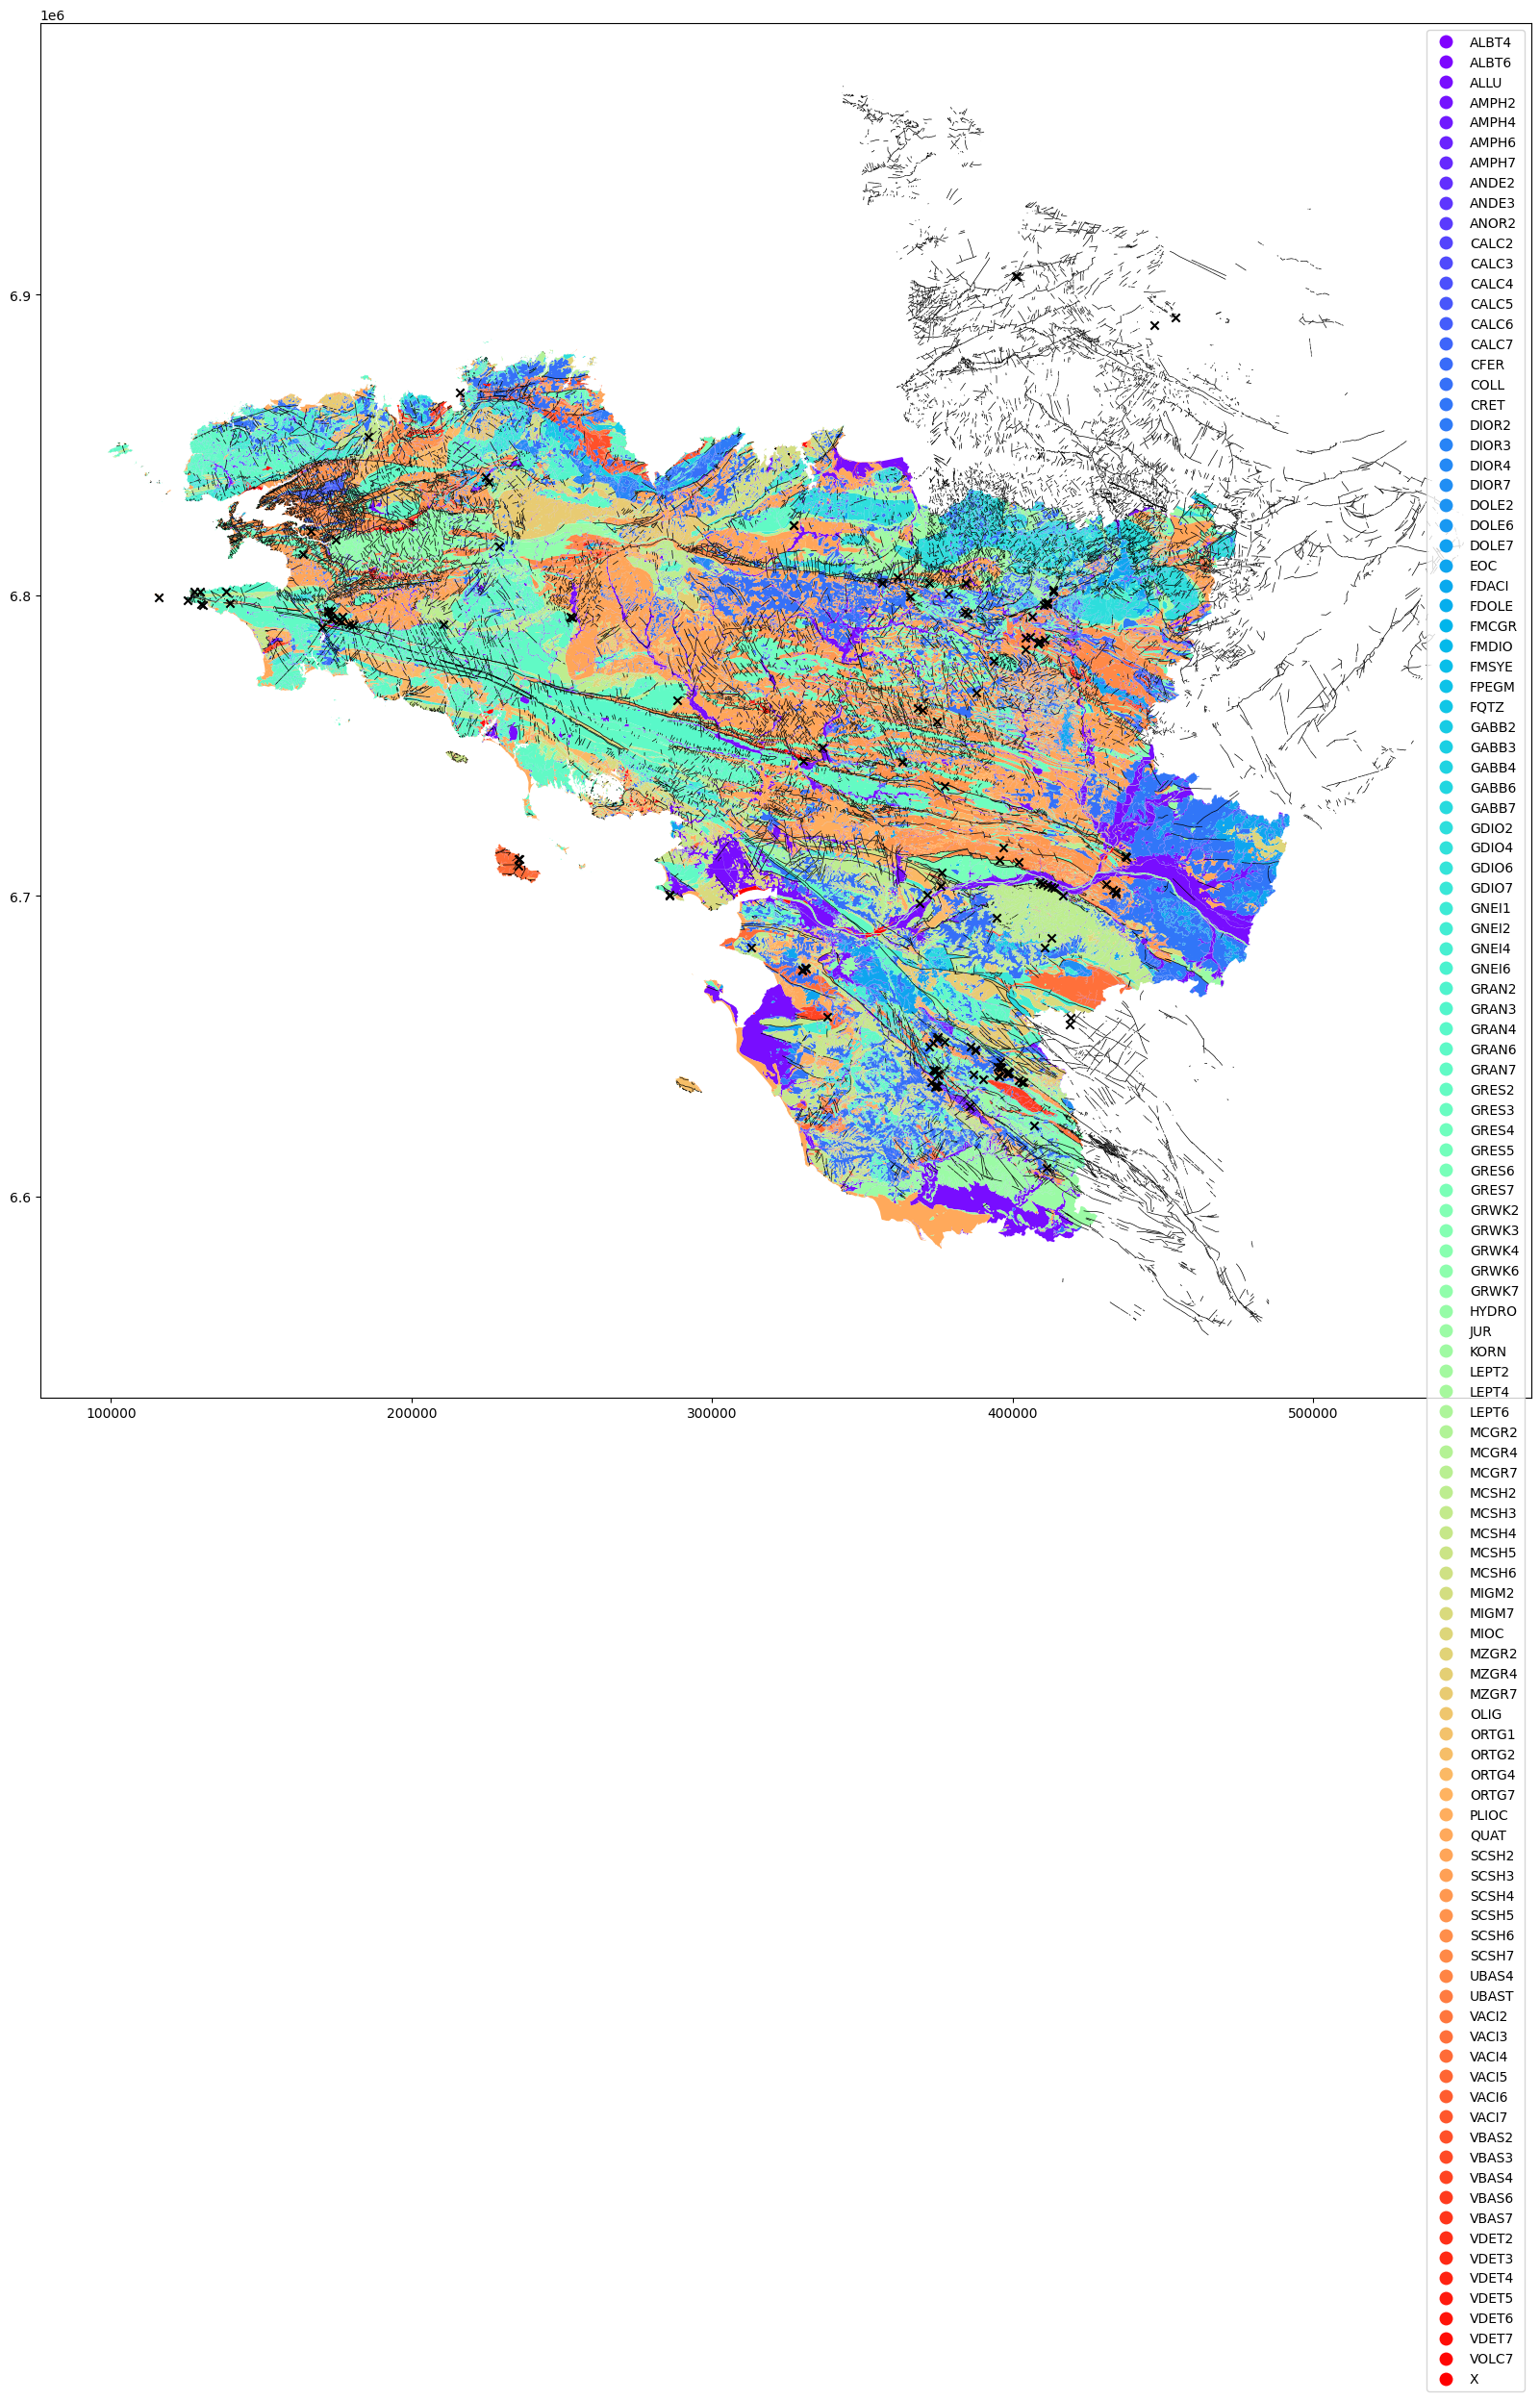

In [12]:
fig1 = geol.plot(column='GSIMPV3', legend=True, categorical=True, figsize=(20,20), cmap='rainbow');
sb.plot(ax=fig1, color='black', marker='x');
faults.plot(ax=fig1, color='black', linewidth = 0.5);

# CBA method

### Define grid mesh

In [13]:
from shapely.geometry import Polygon

def get_grid(working_map, cell_width, cell_height):
    """
    Définit une grille (maillage rectangulaire régulier) comme un ensemble de géométries (rectangles accolés)
    sur la surface totale de la carte fournie, en commençant par le coin supérieur gauche.

    :param working_map: la carte servant de 'bounding box'
    :param cell_width: largeur des cellules rectangulaires
    :param cell_height: hauteur des cellules rectangulaires
    :return: un geoDataFrame contenant toutes les cellules rectangulaires accolées en un pavage classique
    couvrant l'emprise entière de la carte.
    """
    
    # Définition des paramètres de la grille
    xmin, ymin, xmax, ymax = working_map.total_bounds
    rows = int(np.ceil((ymax - ymin) / cell_height))
    cols = int(np.ceil((xmax - xmin) / cell_width))
    x_left_origin = xmin
    x_right_origin = xmin + cell_width
    y_top_origin = ymax
    y_bottom_origin = ymax - cell_height

    print('nombre de colonnes : %s' % cols)
    print('nombre de lignes : %s' % rows)
    print('nombre de cellules total = %s' % (cols * rows))

    # Création de la grille
    data = []
    for i in range(cols):
        print('Traitement de la Colonne n°%s ' % (i + 1))
        y_top = y_top_origin
        y_bottom = y_bottom_origin
        for j in range(rows):
            polygon = Polygon(
                [(x_left_origin, y_top),
                 (x_right_origin, y_top),
                 (x_right_origin, y_bottom),
                 (x_left_origin, y_bottom)])
            data += [[i + j * cols, i, j, polygon]]
            # data += [[i, j, polygon]]
            y_top = y_top - cell_height
            y_bottom = y_bottom - cell_height
        x_left_origin = x_left_origin + cell_width
        x_right_origin = x_right_origin + cell_width
    
    # Intégration de la grille dans un DataFrame puis GeoDataFrame
    result = pd.DataFrame(data, columns=['grid_id', 'x', 'y', 'geom'])
    result.set_index('grid_id', inplace=True)
    return gpd.GeoDataFrame(result, geometry='geom', crs=working_map.crs)

In [14]:
# initialisation de la grille
cell_size = 2000
grid = get_grid(geol, cell_size, cell_size)

nombre de colonnes : 197
nombre de lignes : 152
nombre de cellules total = 29944
Traitement de la Colonne n°1 
Traitement de la Colonne n°2 
Traitement de la Colonne n°3 
Traitement de la Colonne n°4 
Traitement de la Colonne n°5 
Traitement de la Colonne n°6 
Traitement de la Colonne n°7 
Traitement de la Colonne n°8 
Traitement de la Colonne n°9 
Traitement de la Colonne n°10 
Traitement de la Colonne n°11 
Traitement de la Colonne n°12 
Traitement de la Colonne n°13 
Traitement de la Colonne n°14 
Traitement de la Colonne n°15 
Traitement de la Colonne n°16 
Traitement de la Colonne n°17 
Traitement de la Colonne n°18 
Traitement de la Colonne n°19 
Traitement de la Colonne n°20 
Traitement de la Colonne n°21 
Traitement de la Colonne n°22 
Traitement de la Colonne n°23 
Traitement de la Colonne n°24 
Traitement de la Colonne n°25 
Traitement de la Colonne n°26 
Traitement de la Colonne n°27 
Traitement de la Colonne n°28 
Traitement de la Colonne n°29 
Traitement de la Colonne n°30

In [18]:
grid

x    y                                               geom
grid_id                                                             
0          0    0  POLYGON ((99036.261 6885171.231, 101036.261 68...
197        0    1  POLYGON ((99036.261 6883171.231, 101036.261 68...
394        0    2  POLYGON ((99036.261 6881171.231, 101036.261 68...
591        0    3  POLYGON ((99036.261 6879171.231, 101036.261 68...
788        0    4  POLYGON ((99036.261 6877171.231, 101036.261 68...
...      ...  ...                                                ...
29155    196  147  POLYGON ((491036.261 6591171.231, 493036.261 6...
29352    196  148  POLYGON ((491036.261 6589171.231, 493036.261 6...
29549    196  149  POLYGON ((491036.261 6587171.231, 493036.261 6...
29746    196  150  POLYGON ((491036.261 6585171.231, 493036.261 6...
29943    196  151  POLYGON ((491036.261 6583171.231, 493036.261 6...

[29944 rows x 3 columns]

### Spatial join between grid and map

In [16]:
join = gpd.sjoin(grid, geol, how="inner", op='intersects').rename(columns={'geom': 'geometry'})


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [24]:
join.set_geometry('geometry', inplace=True)

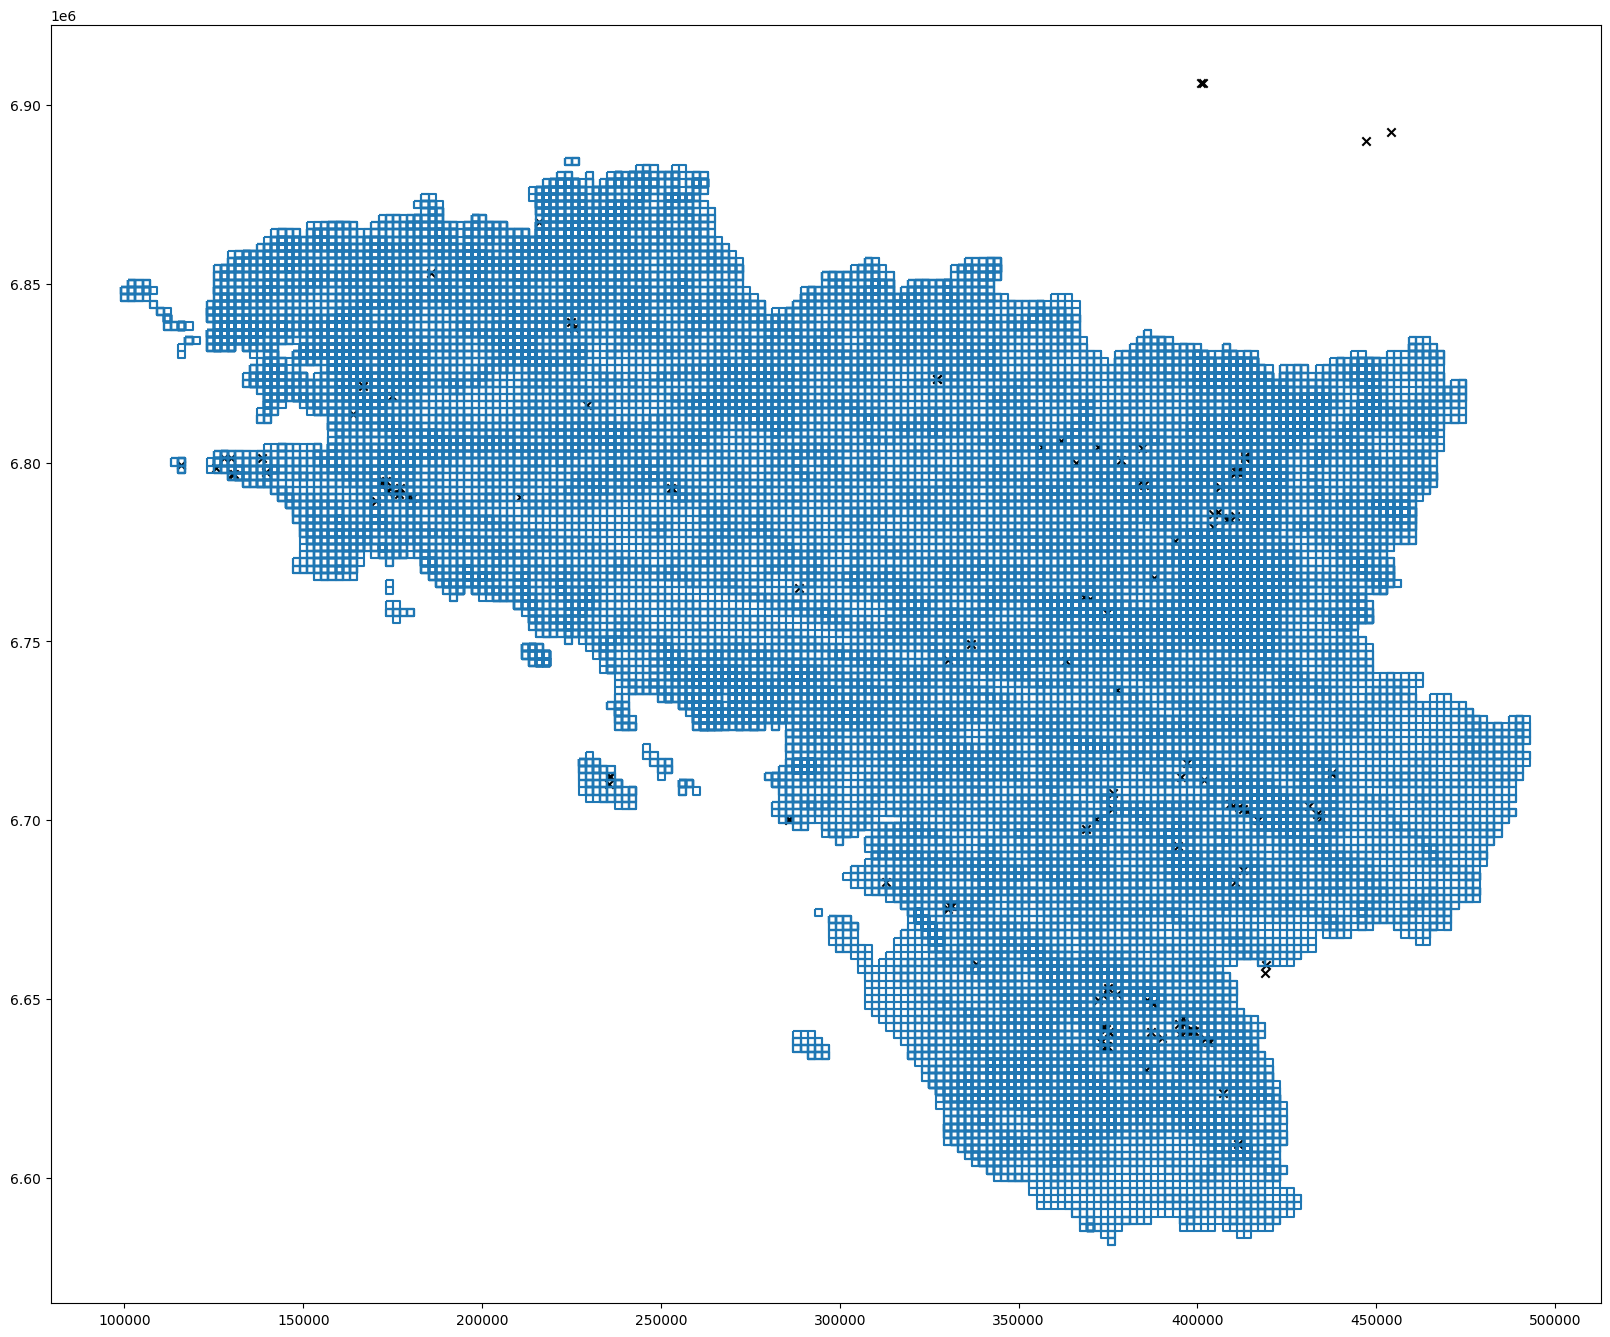

In [26]:
fig = join.boundary.plot(figsize=(20,20));
sb.plot(ax=fig, color='black', marker='x');

### Encode geological map

In [28]:
x = gpd.GeoDataFrame(pd.concat([join.geometry.groupby(join.geometry.index).first(), 
                                pd.get_dummies(join.GSIMPV3).groupby(join.index).max()],
                               axis=1),  geometry='geometry', crs='EPSG:2154')

In [29]:
x

geometry  ALBT4  ALBT6  \
grid_id                                                                    
62       POLYGON ((223036.261 6885171.231, 225036.261 6...      0      0   
63       POLYGON ((225036.261 6885171.231, 227036.261 6...      0      0   
269      POLYGON ((243036.261 6883171.231, 245036.261 6...      0      0   
270      POLYGON ((245036.261 6883171.231, 247036.261 6...      0      0   
271      POLYGON ((247036.261 6883171.231, 249036.261 6...      0      0   
...                                                    ...    ...    ...   
29687    POLYGON ((373036.261 6585171.231, 375036.261 6...      0      0   
29688    POLYGON ((375036.261 6585171.231, 377036.261 6...      0      0   
29706    POLYGON ((411036.261 6585171.231, 413036.261 6...      0      0   
29707    POLYGON ((413036.261 6585171.231, 415036.261 6...      0      0   
29885    POLYGON ((375036.261 6583171.231, 377036.261 6...      0      0   

         ALLU  AMPH2  AMPH4  AMPH6  AMPH7  ANDE2  ANDE3  ...  VBAS6  VBAS7  \
grid_id                                                  ...                 
62          0      0      0      0      0      0      0  ...      0      0   
63          0      0      0      0      0      0      0  ...      0      0   
269         0      0      0      0      0      0      0  ...      0      0   
270         0      0      0      0      0      0      0  ...      0      0   
271         0      0      0      0      0      0      0  ...      0      0   
...       ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
29687       0      0      0      0      0      0      0  ...      0      0   
29688       1      0      0      0      0      0      0  ...      0      0   
29706       1      0      0      0      0      0      0  ...      0      0   
29707       1      0      0      0      0      0      0  ...      0      0   
29885       1      0      0      0      0      0      0  ...      0      0   

         VDET2  VDET3  VDET4  VDET5  VDET6  VDET7  VOLC7  X  
grid_id                                                      
62           0      0      0      0      0      0      0  0  
63           0      0      0      0      0      0      0  0  
269          0      0      0      0      0      0      0  0  
270          0      0      0      0      0      0      0  0  
271          0      0      0      0      0      0      0  0  
...        ...    ...    ...    ...    ...    ...    ... ..  
29687        0      0      0      0      0      0      0  0  
29688        0      0      0      0      0      0      0  0  
29706        0      0      0      0      0      0      0  0  
29707        0      0      0      0      0      0      0  0  
29885        0      0      0      0      0      0      0  0  

[14218 rows x 118 columns]

### Add antimony occurrences

In [30]:
xx = gpd.sjoin(x, sb[['geometry']], how='left', op='contains').rename(columns={'index_right': 'sb'})

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [31]:
xx = xx.sb.groupby(xx.index).count()

In [32]:
xx.value_counts()

0    14113
1       82
2       17
3        5
5        1
Name: sb, dtype: int64

In [33]:
xx.loc[xx >= 1] = 1

In [34]:
xx.value_counts()

0    14113
1      105
Name: sb, dtype: int64

In [35]:
x = pd.concat([x,xx], axis=1)

In [36]:
x

geometry  ALBT4  ALBT6  \
grid_id                                                                    
62       POLYGON ((223036.261 6885171.231, 225036.261 6...      0      0   
63       POLYGON ((225036.261 6885171.231, 227036.261 6...      0      0   
269      POLYGON ((243036.261 6883171.231, 245036.261 6...      0      0   
270      POLYGON ((245036.261 6883171.231, 247036.261 6...      0      0   
271      POLYGON ((247036.261 6883171.231, 249036.261 6...      0      0   
...                                                    ...    ...    ...   
29687    POLYGON ((373036.261 6585171.231, 375036.261 6...      0      0   
29688    POLYGON ((375036.261 6585171.231, 377036.261 6...      0      0   
29706    POLYGON ((411036.261 6585171.231, 413036.261 6...      0      0   
29707    POLYGON ((413036.261 6585171.231, 415036.261 6...      0      0   
29885    POLYGON ((375036.261 6583171.231, 377036.261 6...      0      0   

         ALLU  AMPH2  AMPH4  AMPH6  AMPH7  ANDE2  ANDE3  ...  VBAS7  VDET2  \
grid_id                                                  ...                 
62          0      0      0      0      0      0      0  ...      0      0   
63          0      0      0      0      0      0      0  ...      0      0   
269         0      0      0      0      0      0      0  ...      0      0   
270         0      0      0      0      0      0      0  ...      0      0   
271         0      0      0      0      0      0      0  ...      0      0   
...       ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
29687       0      0      0      0      0      0      0  ...      0      0   
29688       1      0      0      0      0      0      0  ...      0      0   
29706       1      0      0      0      0      0      0  ...      0      0   
29707       1      0      0      0      0      0      0  ...      0      0   
29885       1      0      0      0      0      0      0  ...      0      0   

         VDET3  VDET4  VDET5  VDET6  VDET7  VOLC7  X  sb  
grid_id                                                   
62           0      0      0      0      0      0  0   0  
63           0      0      0      0      0      0  0   0  
269          0      0      0      0      0      0  0   0  
270          0      0      0      0      0      0  0   0  
271          0      0      0      0      0      0  0   0  
...        ...    ...    ...    ...    ...    ... ..  ..  
29687        0      0      0      0      0      0  0   0  
29688        0      0      0      0      0      0  0   0  
29706        0      0      0      0      0      0  0   0  
29707        0      0      0      0      0      0  0   0  
29885        0      0      0      0      0      0  0   0  

[14218 rows x 119 columns]

In [37]:
x.sb.value_counts()

0    14113
1      105
Name: sb, dtype: int64

#### Add geological faults

In [38]:
xx = gpd.sjoin(faults[['geometry']], x, how='right', op='intersects').rename(columns={'index_left': 'faults'})

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [39]:
xx

faults                                           geometry  ALBT4  \
grid_id                                                                     
62          NaN  POLYGON ((223036.261 6885171.231, 225036.261 6...      0   
63          NaN  POLYGON ((225036.261 6885171.231, 227036.261 6...      0   
269         NaN  POLYGON ((243036.261 6883171.231, 245036.261 6...      0   
270         NaN  POLYGON ((245036.261 6883171.231, 247036.261 6...      0   
271         NaN  POLYGON ((247036.261 6883171.231, 249036.261 6...      0   
...         ...                                                ...    ...   
29687       NaN  POLYGON ((373036.261 6585171.231, 375036.261 6...      0   
29688       NaN  POLYGON ((375036.261 6585171.231, 377036.261 6...      0   
29706       NaN  POLYGON ((411036.261 6585171.231, 413036.261 6...      0   
29707       NaN  POLYGON ((413036.261 6585171.231, 415036.261 6...      0   
29885       NaN  POLYGON ((375036.261 6583171.231, 377036.261 6...      0   

         ALBT6  ALLU  AMPH2  AMPH4  AMPH6  AMPH7  ANDE2  ...  VBAS7  VDET2  \
grid_id                                                  ...                 
62           0     0      0      0      0      0      0  ...      0      0   
63           0     0      0      0      0      0      0  ...      0      0   
269          0     0      0      0      0      0      0  ...      0      0   
270          0     0      0      0      0      0      0  ...      0      0   
271          0     0      0      0      0      0      0  ...      0      0   
...        ...   ...    ...    ...    ...    ...    ...  ...    ...    ...   
29687        0     0      0      0      0      0      0  ...      0      0   
29688        0     1      0      0      0      0      0  ...      0      0   
29706        0     1      0      0      0      0      0  ...      0      0   
29707        0     1      0      0      0      0      0  ...      0      0   
29885        0     1      0      0      0      0      0  ...      0      0   

         VDET3  VDET4  VDET5  VDET6  VDET7  VOLC7  X  sb  
grid_id                                                   
62           0      0      0      0      0      0  0   0  
63           0      0      0      0      0      0  0   0  
269          0      0      0      0      0      0  0   0  
270          0      0      0      0      0      0  0   0  
271          0      0      0      0      0      0  0   0  
...        ...    ...    ...    ...    ...    ... ..  ..  
29687        0      0      0      0      0      0  0   0  
29688        0      0      0      0      0      0  0   0  
29706        0      0      0      0      0      0  0   0  
29707        0      0      0      0      0      0  0   0  
29885        0      0      0      0      0      0  0   0  

[60337 rows x 120 columns]

In [40]:
xx = xx.faults.groupby(xx.index).count()

In [41]:
x = pd.concat([x, xx], axis=1)

In [42]:
x

geometry  ALBT4  ALBT6  \
grid_id                                                                    
62       POLYGON ((223036.261 6885171.231, 225036.261 6...      0      0   
63       POLYGON ((225036.261 6885171.231, 227036.261 6...      0      0   
269      POLYGON ((243036.261 6883171.231, 245036.261 6...      0      0   
270      POLYGON ((245036.261 6883171.231, 247036.261 6...      0      0   
271      POLYGON ((247036.261 6883171.231, 249036.261 6...      0      0   
...                                                    ...    ...    ...   
29687    POLYGON ((373036.261 6585171.231, 375036.261 6...      0      0   
29688    POLYGON ((375036.261 6585171.231, 377036.261 6...      0      0   
29706    POLYGON ((411036.261 6585171.231, 413036.261 6...      0      0   
29707    POLYGON ((413036.261 6585171.231, 415036.261 6...      0      0   
29885    POLYGON ((375036.261 6583171.231, 377036.261 6...      0      0   

         ALLU  AMPH2  AMPH4  AMPH6  AMPH7  ANDE2  ANDE3  ...  VDET2  VDET3  \
grid_id                                                  ...                 
62          0      0      0      0      0      0      0  ...      0      0   
63          0      0      0      0      0      0      0  ...      0      0   
269         0      0      0      0      0      0      0  ...      0      0   
270         0      0      0      0      0      0      0  ...      0      0   
271         0      0      0      0      0      0      0  ...      0      0   
...       ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
29687       0      0      0      0      0      0      0  ...      0      0   
29688       1      0      0      0      0      0      0  ...      0      0   
29706       1      0      0      0      0      0      0  ...      0      0   
29707       1      0      0      0      0      0      0  ...      0      0   
29885       1      0      0      0      0      0      0  ...      0      0   

         VDET4  VDET5  VDET6  VDET7  VOLC7  X  sb  faults  
grid_id                                                    
62           0      0      0      0      0  0   0       0  
63           0      0      0      0      0  0   0       0  
269          0      0      0      0      0  0   0       0  
270          0      0      0      0      0  0   0       0  
271          0      0      0      0      0  0   0       0  
...        ...    ...    ...    ...    ... ..  ..     ...  
29687        0      0      0      0      0  0   0       0  
29688        0      0      0      0      0  0   0       0  
29706        0      0      0      0      0  0   0       0  
29707        0      0      0      0      0  0   0       0  
29885        0      0      0      0      0  0   0       0  

[14218 rows x 120 columns]

In [43]:
x.faults.unique()

array([ 0,  1,  2,  4,  5, 14,  7,  3, 12, 10,  9,  8, 18,  6, 11, 13, 15,
       17, 16, 38, 39, 21, 26, 33, 20, 28, 19, 23, 24, 29, 42, 25, 49, 40,
       30, 44, 43, 36, 27, 32, 81, 22, 37, 56, 35, 31, 54, 34, 45, 60, 50,
       41, 62, 66, 47, 52, 82, 51, 69, 61, 67, 70, 46, 57], dtype=int64)

# Machine learning

## Preprocessing

In [44]:
y = x.sb.values

In [45]:
xx = x.drop(columns=['geometry', 'sb'])

In [46]:
xx.stack().value_counts()

0     1601784
1       68890
2        1296
3        1015
4         804
       ...   
69          1
67          1
70          1
81          1
57          1
Length: 64, dtype: int64

In [47]:
xx.stack().value_counts()[0]/xx.stack().value_counts()[1]

23.2513282043838

In [49]:
xx

ALBT4  ALBT6  ALLU  AMPH2  AMPH4  AMPH6  AMPH7  ANDE2  ANDE3  ANOR2  \
grid_id                                                                        
62           0      0     0      0      0      0      0      0      0      0   
63           0      0     0      0      0      0      0      0      0      0   
269          0      0     0      0      0      0      0      0      0      0   
270          0      0     0      0      0      0      0      0      0      0   
271          0      0     0      0      0      0      0      0      0      0   
...        ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
29687        0      0     0      0      0      0      0      0      0      0   
29688        0      0     1      0      0      0      0      0      0      0   
29706        0      0     1      0      0      0      0      0      0      0   
29707        0      0     1      0      0      0      0      0      0      0   
29885        0      0     1      0      0      0      0      0      0      0   

         ...  VBAS7  VDET2  VDET3  VDET4  VDET5  VDET6  VDET7  VOLC7  X  \
grid_id  ...                                                              
62       ...      0      0      0      0      0      0      0      0  0   
63       ...      0      0      0      0      0      0      0      0  0   
269      ...      0      0      0      0      0      0      0      0  0   
270      ...      0      0      0      0      0      0      0      0  0   
271      ...      0      0      0      0      0      0      0      0  0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ... ..   
29687    ...      0      0      0      0      0      0      0      0  0   
29688    ...      0      0      0      0      0      0      0      0  0   
29706    ...      0      0      0      0      0      0      0      0  0   
29707    ...      0      0      0      0      0      0      0      0  0   
29885    ...      0      0      0      0      0      0      0      0  0   

         faults  
grid_id          
62            0  
63            0  
269           0  
270           0  
271           0  
...         ...  
29687         0  
29688         0  
29706         0  
29707         0  
29885         0  

[14218 rows x 118 columns]

In [49]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import optuna  # pip install optuna
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.metrics import fbeta_score, roc_auc_score, brier_score_loss, log_loss, average_precision_score

## Split & Normalization

In [53]:
from sklearn.model_selection import train_test_split
# Separate into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
                xx, y, test_size=0.1, shuffle=True, stratify=y, random_state=0)

#x_train, x_cal, y_train, y_cal = train_test_split(
#                x_train, y_train, test_size=0.1, shuffle=True, stratify=y_train, random_state=1234)



In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#X = sc.fit_transform(x.drop(columns=['sb', 'geometry', 'faults', 'streams']))


#X = x.drop(columns=['sb', 'geometry', 'faults', 'streams']).values

In [55]:
pd.DataFrame(x_train)

0         1         2       3         4         5         6    \
0     -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
1     -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
2     -0.015313 -0.027966 -1.923787 -0.1482 -0.118772 -0.076784 -0.029332   
3     -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
4     -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
...         ...       ...       ...     ...       ...       ...       ...   
12791 -0.015313 -0.027966 -1.923787 -0.1482 -0.118772 -0.076784 -0.029332   
12792 -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
12793 -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
12794 -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   
12795 -0.015313 -0.027966  0.519808 -0.1482 -0.118772 -0.076784 -0.029332   

            7         8         9    ...       108       109       110  \
0     -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
1     -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
2     -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
3     -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
4     -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
...         ...       ...       ...  ...       ...       ...       ...   
12791 -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
12792 -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
12793 -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
12794 -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   
12795 -0.045984 -0.017683 -0.012503  ... -0.077297 -0.046829 -0.063878   

            111       112       113      114       115       116       117  
0     -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524 -0.606017  
1     -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524  0.340742  
2     -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524  0.025156  
3     -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524  0.340742  
4     -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524 -0.448223  
...         ...       ...       ...      ...       ...       ...       ...  
12791 -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524  0.340742  
12792 -0.071454 -0.044244 -0.030638 -0.08875 -0.043349  4.639846 -0.290430  
12793 -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524 -0.606017  
12794 -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524 -0.606017  
12795 -0.071454 -0.044244 -0.030638 -0.08875 -0.043349 -0.215524  1.287501  

[12796 rows x 118 columns]

In [56]:
x_train.shape

(12796, 118)

In [57]:
x_test.shape

(1422, 118)

In [58]:
pd.Series(y_train).value_counts()

0    12702
1       94
dtype: int64

In [59]:
pd.Series(y_test).value_counts()

0    1411
1      11
dtype: int64

## Random Forest approach

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
rf_clf = RandomForestClassifier(
    class_weight='balanced',
    n_jobs=1,
    random_state=0)

In [104]:
# On définit à la main les différents hyperparamètres à tester
param_grid = {
    "criterion": ['gini', 'entropy'],
    "n_estimators": [100, 300, 500],
    "max_depth": [50, 100, 200],
    #"num_leaves": [3, 10, 15],
    #"learning_rate": [0.05, 0.1, 0.5],
    #"min_data_in_leaf": [100, 500, 1000],
    #"reg_alpha": [0, 0.5 ,1],
    #"reg_lambda": [0, 0.5 ,1],
    #"boosting_type": ['gbdt', 'goss']
    #"max_features": ['sqrt', 'log2', 0.1, 0.2, 0.3, 0.5, 1.0],
    #"min_impurity_decrease": sp_uniform(0.0, 0.5),
    # "min_weight_fraction_leaf": (0.0, 0.1, 0.2, 0.4),
    #"min_samples_split": [2, 5, 10],
    }


In [105]:
from sklearn.model_selection import StratifiedKFold
n_splits=5
#n_repeats=3

# La méthod StratifiedKFold permet de garder dans chaque fold une proportion représentative des différentes classes:
# idéale pour notre dataset non équilibré

#cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# with calibration
#cal = CalibratedClassifierCV(clf)

grid = GridSearchCV(
    rf_clf,
    param_grid= param_grid,
    refit=True,
    scoring='average_precision',
    cv=cv,
    #iid=False,
    n_jobs=1,
    verbose=3,
)

In [106]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=50, n_estimators=100;, score=0.036 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=50, n_estimators=100;, score=0.061 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=50, n_estimators=100;, score=0.043 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=50, n_estimators=100;, score=0.022 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=50, n_estimators=100;, score=0.019 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=50, n_estimators=300;, score=0.040 total time=   2.3s
[CV 2/5] END criterion=gini, max_depth=50, n_estimators=300;, score=0.105 total time=   2.2s
[CV 3/5] END criterion=gini, max_depth=50, n_estimators=300;, score=0.048 total time=   2.3s
[CV 4/5] END criterion=gini, max_depth=50, n_estimators=300;, score=0.026 total time=   2.4s
[CV 5/5] END criterion=gini, max_depth=50, n_estimators=300;, score=0.022 total time=   2.3s
[CV 1/5] 

[CV 2/5] END criterion=entropy, max_depth=200, n_estimators=500;, score=0.113 total time=   3.8s
[CV 3/5] END criterion=entropy, max_depth=200, n_estimators=500;, score=0.047 total time=   4.8s
[CV 4/5] END criterion=entropy, max_depth=200, n_estimators=500;, score=0.025 total time=   4.2s
[CV 5/5] END criterion=entropy, max_depth=200, n_estimators=500;, score=0.024 total time=   4.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced', n_jobs=1,
                                              random_state=0),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100, 200],
                         'n_estimators': [100, 300, 500]},
             scoring='average_precision', verbose=3)

In [95]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 300}

In [96]:
grid.best_score_

0.736824729589677

In [97]:
y_pred = grid.best_estimator_.predict(x_test)

y_proba = grid.best_estimator_.predict_proba(x_test)[:,1]

**Classifier calibration**

In [98]:
from sklearn.calibration import CalibrationDisplay

In [99]:
from sklearn.utils.class_weight import compute_sample_weight

sw_test = compute_sample_weight('balanced', y_test)
sw_train = compute_sample_weight('balanced', y_train)

In [107]:
from sklearn.calibration import CalibratedClassifierCV

clf_cal = CalibratedClassifierCV(grid.best_estimator_, cv='prefit', method="sigmoid")
clf_cal.fit(x_train, y_train, sample_weight=sw_train)
y_probc = clf_cal.predict_proba(x_test)[:,1]

<AxesSubplot:>

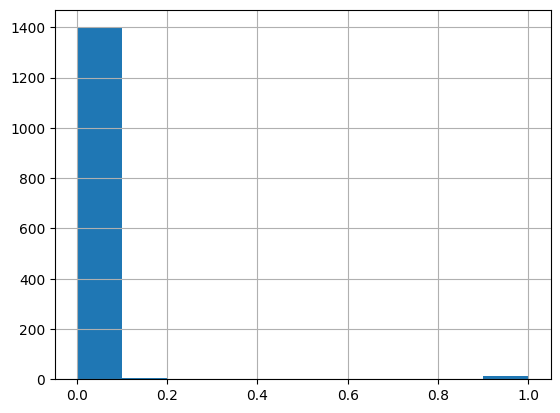

In [108]:
pd.Series(y_probc).hist()

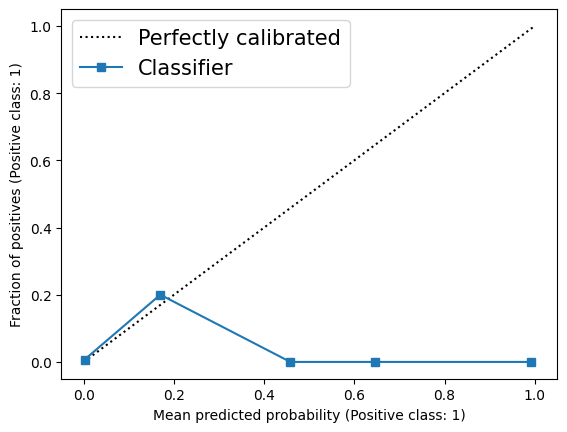

In [109]:
CalibrationDisplay.from_predictions(y_test, y_probc, n_bins=10)
plt.rc('font', size=15)
plt.legend(loc='upper left')

**ROC curve**

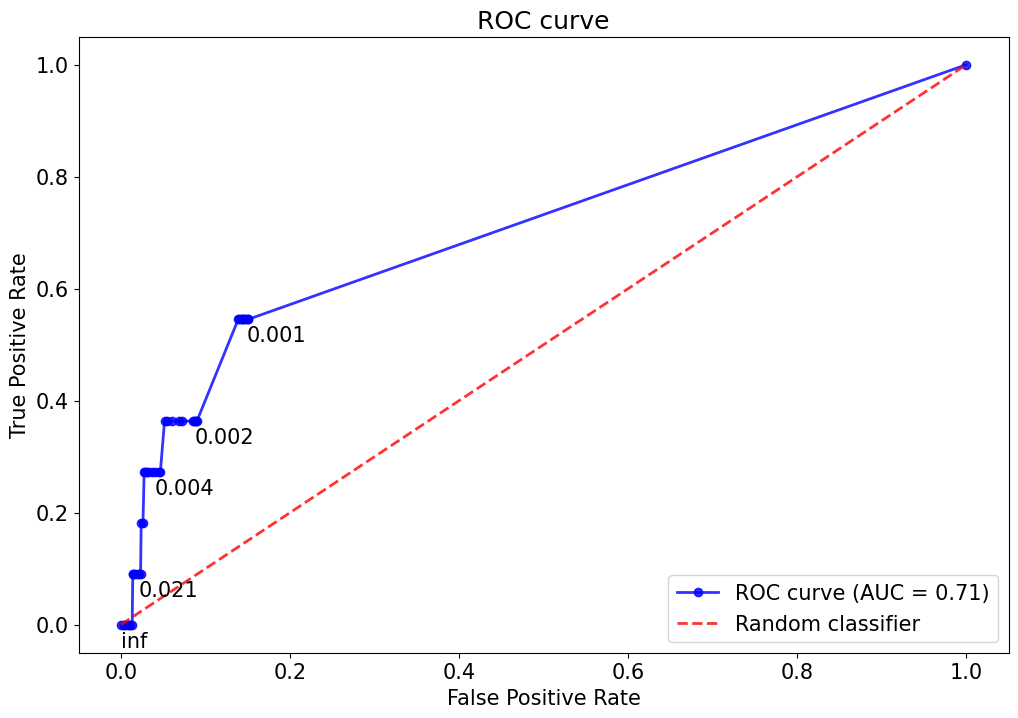

In [110]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probc, pos_label=1, drop_intermediate=True)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8, color='b', marker='o',
         label='ROC curve (AUC = %0.2f)' % (roc_auc))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random classifier', alpha=.8)

for x_txt, y_txt, txt in zip(fpr[::10], tpr[::10], thresholds[::10]):
    plt.annotate(np.round(txt,3), (x_txt, y_txt-0.04))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.gcf().set_size_inches(12, 8)
plt.show()
plt.rc('font', size=16) 

**PRC curve**

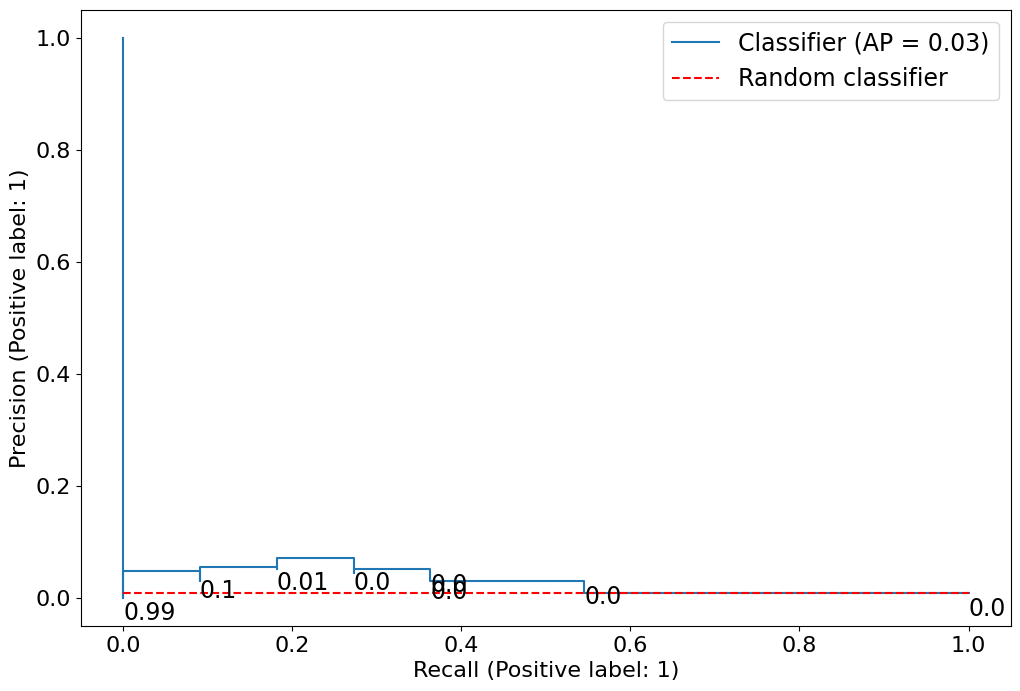

In [117]:
PrecisionRecallDisplay.from_predictions(y_test, y_probc)

precision, recall, thresholds = precision_recall_curve(y_test, y_probc, pos_label=1)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Random classifier', color='red')
plt.gcf().set_size_inches(12, 8)
plt.rc('font', size=17)
plt.legend(loc='upper right')

for x_txt, y_txt, txt in zip(recall[::10], precision[::10], thresholds[::10]):
    plt.annotate(np.round(txt,2), (x_txt, y_txt-0.04))

# Proposed approach

In [118]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better



In [130]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss_sklearn:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

#    def lgb_obj(self, preds, train_data):
#        y = train_data.get_label()
#        p = special.expit(preds)
#        return self.grad(y, p), self.hess(y, p)

#    def lgb_eval(self, preds, train_data):
#        y = train_data.get_label()
#        p = special.expit(preds)
#        is_higher_better = False
#        return 'focal_loss', self(y, p).mean(), is_higher_better
    
    def lgb_obj(self, y_true, preds):
        #y = train_data #train_data.get_label()
        p = special.expit(preds)
        return self.grad(y_true, p), self.hess(y_true, p)

    def lgb_eval(self, y_true, preds):
        #y = train_data #train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y_true, p).mean(), is_higher_better


In [123]:
import pickle as pkl
from sklearn.metrics import roc_auc_score
from optuna.integration import LightGBMPruningCallback
import lightgbm as lgb
import optuna

early_stopping = lgb.early_stopping(stopping_rounds=20, first_metric_only=False)

optuna.logging.set_verbosity(optuna.logging.CRITICAL)


def objective(trial, X, y): 
    
    param_grid = {
    "is_unbalance" : True,
    "verbose" : -1,
    "seed" : 0,
    "learning_rate": 0.05,
    "n_estimators": 3000,
    "num_leaves": trial.suggest_int("num_leaves", 5, 995, step=10),
    "max_depth": trial.suggest_int("max_depth", 5, 95, step=5),
    "lambda_l2": trial.suggest_int("reg_lambda", 0, 50, step=5), 
    "focal_alpha": trial.suggest_float("focal_alpha", 0.5, 0.9),
    "focal_gamma": trial.suggest_float("focal_gamma", 3, 9),
    }

    
    fl = FocalLoss(alpha=param_grid['focal_alpha'], gamma=param_grid['focal_gamma'])

    
    X_ds = lgb.Dataset(X, label=y)

    hist = lgb.cv(param_grid, train_set=X_ds,
              nfold=5, stratified=True, eval_train_metric=True,
              fobj = fl.lgb_obj, feval = fl.lgb_eval, 
              return_cvbooster=True, callbacks=[early_stopping,
                                               LightGBMPruningCallback(trial, 'valid focal_loss')])
    

    scorer_mean = hist['valid focal_loss-mean'][-1]
    
    cvbooster = hist['cvbooster']
    
    # Save a trained model to a file.
    with open("{}.pickle".format(trial.number), "wb") as fout:
        pkl.dump(cvbooster, fout)

    return scorer_mean #TODO: try to improve brier_score_loss instead

In [124]:
sampler = optuna.samplers.TPESampler(seed=0) 
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier", sampler=sampler)
func = lambda trial: objective(trial, x_train, y_train)
study.optimize(func, n_trials=100)

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[119]	cv_agg's train focal_loss: 0.00248132 + 0.00161568	cv_agg's valid focal_loss: 0.00253193 + 0.00155939


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[143]	cv_agg's train focal_loss: 0.000588523 + 4.43452e-06	cv_agg's valid focal_loss: 0.000727408 + 1.57e-05


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[143]	cv_agg's train focal_loss: 0.000588523 + 4.43452e-06	cv_agg's valid focal_loss: 0.000727408 + 1.57e-05


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[283]	cv_agg's train focal_loss: 0.000171772 + 0.000138779	cv_agg's valid focal_loss: 0.000185288 + 0.000132102


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[283]	cv_agg's train focal_loss: 0.000171772 + 0.000138779	cv_agg's valid focal_loss: 0.000185288 + 0.000132102


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[283]	cv_agg's train focal_loss: 0.000171772 + 0.000138779	cv_agg's valid focal_loss: 0.000185288 + 0.000132102


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[63]	cv_agg's train focal_loss: 6.10526e-05 + 1.97902e-06	cv_agg's valid focal_loss: 8.46579e-05 + 3.62575e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[63]	cv_agg's train focal_loss: 6.10526e-05 + 1.97902e-06	cv_agg's valid focal_loss: 8.46579e-05 + 3.62575e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[63]	cv_agg's train focal_loss: 6.10526e-05 + 1.97902e-06	cv_agg's valid focal_loss: 8.46579e-05 + 3.62575e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[63]	cv_agg's train focal_loss: 6.10526e-05 + 1.97902e-06	cv_agg's valid focal_loss: 8.46579e-05 + 3.62575e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-pac

Early stopping, best iteration is:
[51]	cv_agg's train focal_loss: 4.49506e-05 + 7.73908e-07	cv_agg's valid focal_loss: 8.04891e-05 + 1.84715e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-pac

Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-pac

Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-pac

Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[139]	cv_agg's train focal_loss: 5.66282e-05 + 4.80139e-07	cv_agg's valid focal_loss: 6.97537e-05 + 1.537e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[137]	cv_agg's train focal_loss: 5.57519e-05 + 4.15957e-07	cv_agg's valid focal_loss: 6.8639e-05 + 1.44934e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[170]	cv_agg's train focal_loss: 5.56762e-05 + 4.61127e-07	cv_agg's valid focal_loss: 6.80686e-05 + 1.31582e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[170]	cv_agg's train focal_loss: 5.56762e-05 + 4.61127e-07	cv_agg's valid focal_loss: 6.80686e-05 + 1.31582e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[170]	cv_agg's train focal_loss: 5.56762e-05 + 4.61127e-07	cv_agg's valid focal_loss: 6.80686e-05 + 1.31582e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[180]	cv_agg's train focal_loss: 5.51458e-05 + 3.47385e-07	cv_agg's valid focal_loss: 6.5194e-05 + 1.2235e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[180]	cv_agg's train focal_loss: 5.51458e-05 + 3.47385e-07	cv_agg's valid focal_loss: 6.5194e-05 + 1.2235e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[180]	cv_agg's train focal_loss: 5.51458e-05 + 3.47385e-07	cv_agg's valid focal_loss: 6.5194e-05 + 1.2235e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[208]	cv_agg's train focal_loss: 5.46703e-05 + 3.60946e-07	cv_agg's valid focal_loss: 6.43363e-05 + 1.26266e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[208]	cv_agg's train focal_loss: 5.46703e-05 + 3.60946e-07	cv_agg's valid focal_loss: 6.43363e-05 + 1.26266e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[208]	cv_agg's train focal_loss: 5.46703e-05 + 3.60946e-07	cv_agg's valid focal_loss: 6.43363e-05 + 1.26266e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[210]	cv_agg's train focal_loss: 5.30957e-05 + 3.46908e-07	cv_agg's valid focal_loss: 6.24486e-05 + 1.22025e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-pac

Early stopping, best iteration is:
[210]	cv_agg's train focal_loss: 5.30957e-05 + 3.46908e-07	cv_agg's valid focal_loss: 6.24486e-05 + 1.22025e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[210]	cv_agg's train focal_loss: 5.30957e-05 + 3.46908e-07	cv_agg's valid focal_loss: 6.24486e-05 + 1.22025e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[210]	cv_agg's train focal_loss: 5.30957e-05 + 3.46908e-07	cv_agg's valid focal_loss: 6.24486e-05 + 1.22025e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[238]	cv_agg's train focal_loss: 4.9181e-05 + 3.45279e-07	cv_agg's valid focal_loss: 5.87529e-05 + 1.12911e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[238]	cv_agg's train focal_loss: 4.9181e-05 + 3.45279e-07	cv_agg's valid focal_loss: 5.87529e-05 + 1.12911e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[299]	cv_agg's train focal_loss: 4.71678e-05 + 3.73992e-07	cv_agg's valid focal_loss: 5.70433e-05 + 1.13974e-06


C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [125]:
print(f"\tBest value: {study.best_value:}")
print(f"\tBest trial: {study.best_trial.number}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
# # Load the best model.
# with open("{}.pickle".format(study.best_trial.number), "rb") as fin:
#     best_clf = pkl.load(fin)

	Best value: 5.7043337445775427e-05
	Best trial: 98
	Best params:
		num_leaves: 555
		max_depth: 55
		reg_lambda: 30
		focal_alpha: 0.8992147079168203
		focal_gamma: 8.99962538226985


In [126]:
best_params={}
best_params['learning_rate'] = 0.05
best_params['num_leaves'] = 555
best_params['max_depth'] = 55
best_params['reg_lambda'] = 30
best_params['focal_alpha'] = 0.899
best_params['focal_gamma'] = 8.999

In [127]:
try:
    del best_clf, best_fl
except:
    pass

**Retrain on train dataset (implicitly done in random forest approach)**

In [128]:
x_fit, x_val, y_fit, y_val = train_test_split(x_train, y_train, test_size=0.15, stratify=y_train, random_state=0)

In [131]:
best_fl = FocalLoss_sklearn(alpha=best_params['focal_alpha'], gamma=best_params['focal_gamma'])

In [132]:
best_clf = lgb.LGBMClassifier(objective = best_fl.lgb_obj, metric='custom', n_estimators=3000, is_unbalance=True, random_state=0)
best_clf.set_params(**best_params)

LGBMClassifier(focal_alpha=0.899, focal_gamma=8.999, is_unbalance=True,
               learning_rate=0.05, max_depth=55, metric='custom',
               n_estimators=3000, num_leaves=555,
               objective=<bound method FocalLoss_sklearn.lgb_obj of <__main__.FocalLoss_sklearn object at 0x000002139589CAC0>>,
               random_state=0, reg_lambda=30)

In [133]:
best_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 55,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 3000,
 'n_jobs': -1,
 'num_leaves': 555,
 'objective': <bound method FocalLoss_sklearn.lgb_obj of <__main__.FocalLoss_sklearn object at 0x000002139589CAC0>>,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 30,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'custom',
 'is_unbalance': True,
 'focal_alpha': 0.899,
 'focal_gamma': 8.999}

In [134]:
early_stopping = lgb.early_stopping(20, first_metric_only=False)

best_clf.fit(x_fit, y_fit, eval_set=[(x_fit, y_fit), (x_val, y_val)], 
             eval_metric = best_fl.lgb_eval,
             callbacks=[early_stopping]
            )
# best_clf.fit(x_train, y_train, eval_set=[(x_train, y_train)], 
#              eval_metric = best_fl.lgb_eval, verbose=-1)

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[869]	training's focal_loss: 3.99664e-05	valid_1's focal_loss: 4.66586e-05


LGBMClassifier(focal_alpha=0.899, focal_gamma=8.999, is_unbalance=True,
               learning_rate=0.05, max_depth=55, metric='custom',
               n_estimators=3000, num_leaves=555,
               objective=<bound method FocalLoss_sklearn.lgb_obj of <__main__.FocalLoss_sklearn object at 0x000002139589CAC0>>,
               random_state=0, reg_lambda=30)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='focal_loss'>

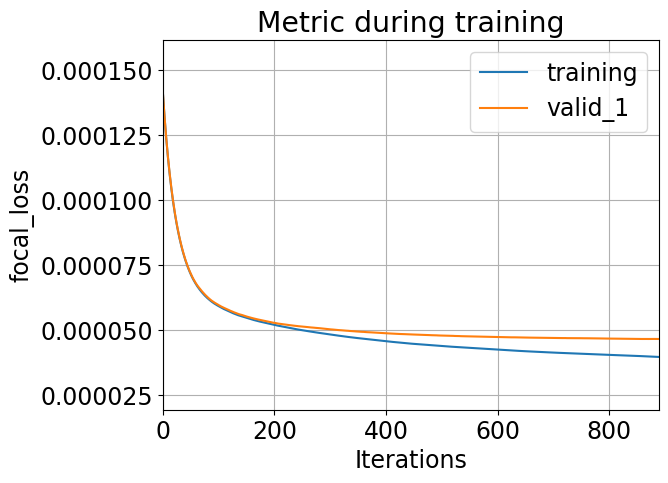

In [135]:
lgb.plot_metric(best_clf, metric='focal_loss')

In [136]:
best_clf.best_iteration_

869

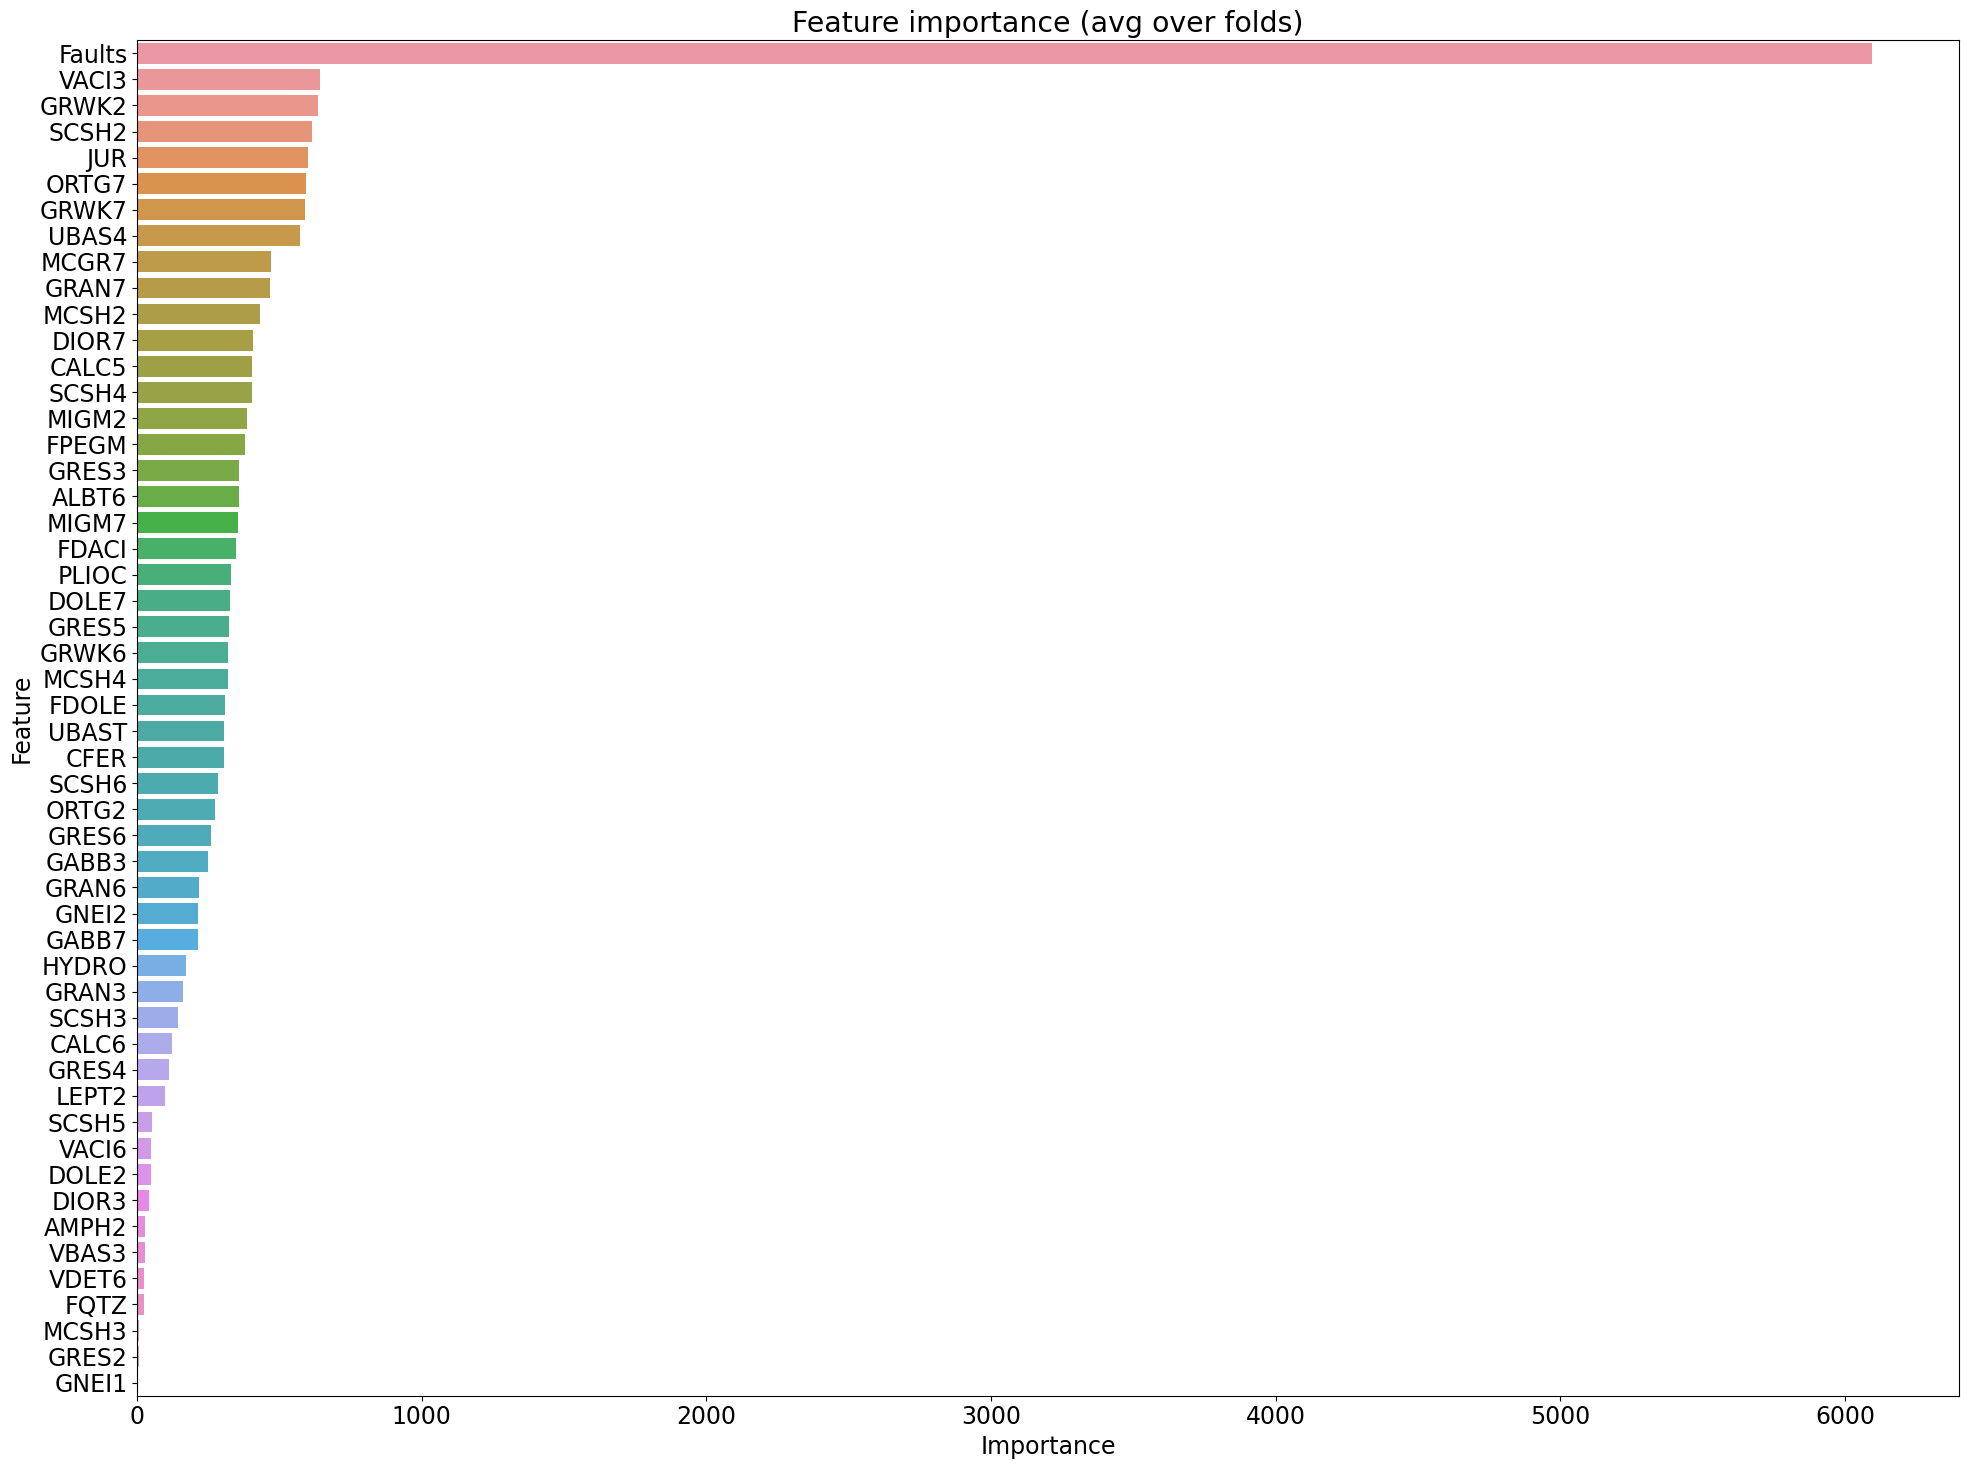

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(best_clf.feature_importances_, x.columns)), columns=['Importance','Feature'])

feature_imp = feature_imp[feature_imp['Importance'] > 0].sort_values(by="Importance", ascending=False).replace('X','Faults')

plt.figure(figsize=(20, 15))
sns.barplot(x="Importance", y="Feature", data=feature_imp)
plt.title('Feature importance (avg over folds)')
plt.tight_layout()
plt.show()

**Faire une prédiction**

In [138]:
# if custom loss function
#y_proba = sigmoid(best_clf.predict(x_test))
y_proba = special.expit(best_fl.init_score(y_train) + best_clf.predict(x_test))

y_pred = (y_proba > 0.5).astype('int')

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


**Classifier calibration**

In [139]:
from sklearn.calibration import CalibrationDisplay

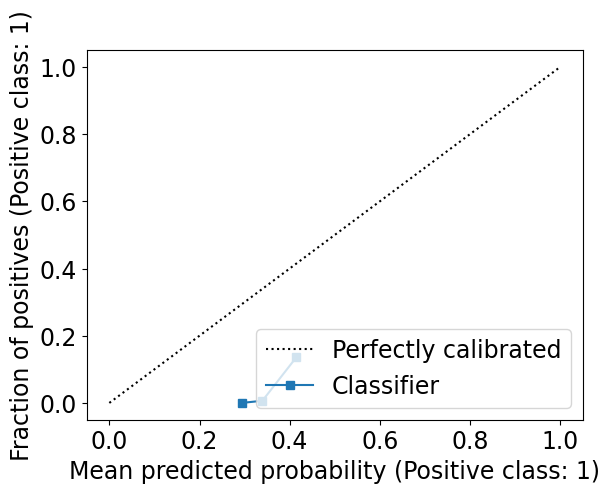

In [140]:
CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10)

In [141]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR(class_weight='balanced')														# default param values
tr_proba = special.expit(best_fl.init_score(y_fit)+best_clf.predict(x_fit))
lr.fit(tr_proba.reshape( -1, 1 ), y_fit)                       # LR needs X to be 2-dimensional
y_probc = lr.predict_proba(y_proba.reshape( -1, 1 ))[:,1]

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


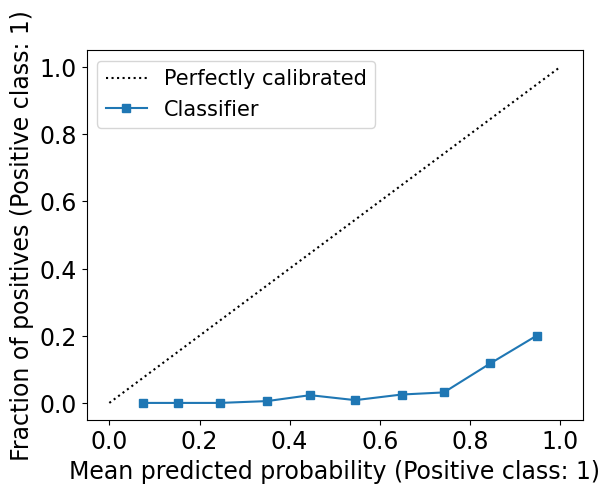

In [142]:
CalibrationDisplay.from_predictions(y_test, y_probc, n_bins=10)
plt.rc('font', size=15)
plt.legend(loc='upper left')


**ROC curve**

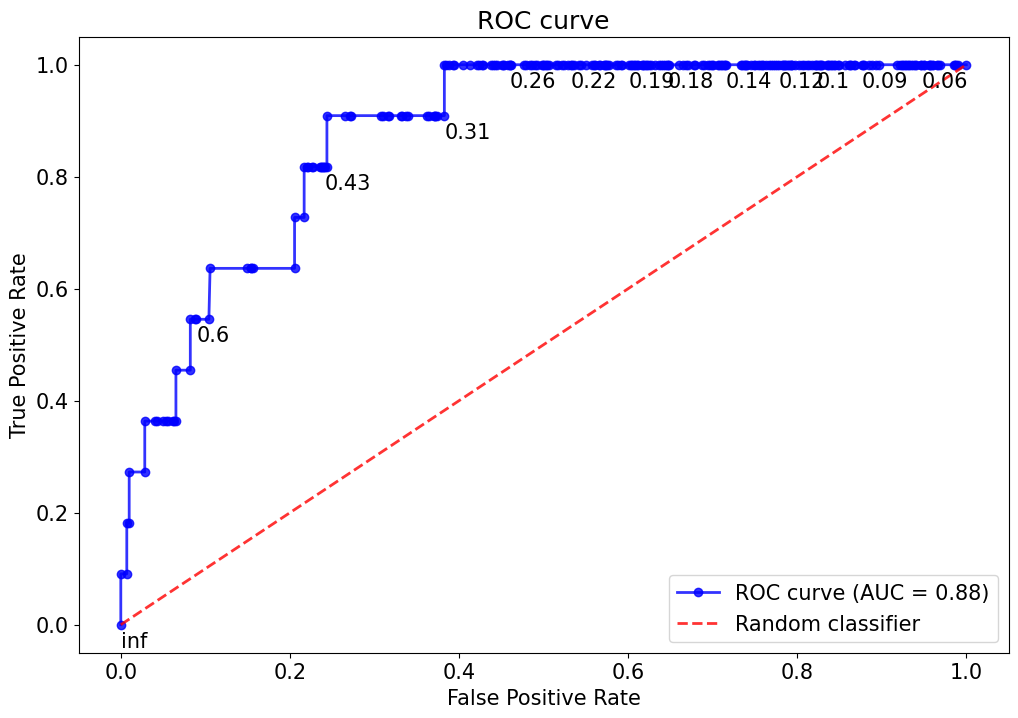

In [143]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probc, pos_label=1, drop_intermediate=True)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8, color='b', marker='o',
         label='ROC curve (AUC = %0.2f)' % (roc_auc))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random classifier', alpha=.8)

for x_txt, y_txt, txt in zip(fpr[::20], tpr[::20], thresholds[::20]):
    plt.annotate(np.round(txt,2), (x_txt, y_txt-0.04))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.gcf().set_size_inches(12, 8)
plt.show()
plt.rc('font', size=15) 

**PRC curve**

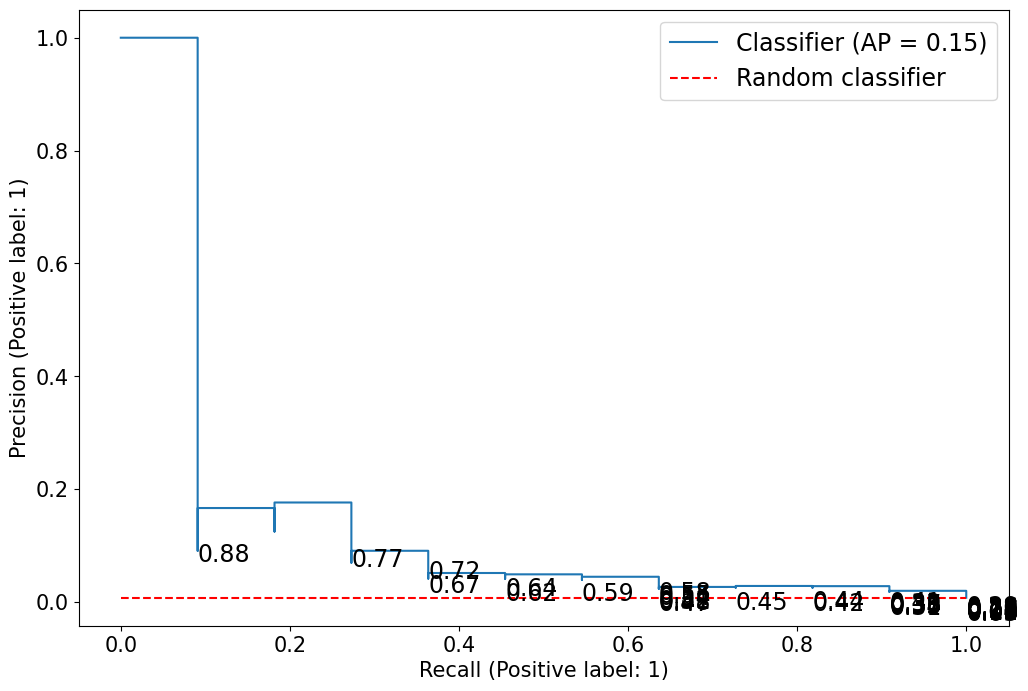

In [144]:
PrecisionRecallDisplay.from_predictions(y_test, y_probc)

precision, recall, thresholds = precision_recall_curve(y_test, y_probc, pos_label=1)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Random classifier', color='red')
plt.gcf().set_size_inches(12, 8)
plt.rc('font', size=17)
plt.legend(loc='upper right')

for x_txt, y_txt, txt in zip(recall[::20], precision[::20], thresholds[::20]):
    plt.annotate(np.round(txt,2), (x_txt, y_txt-0.04))

# for x_txt, y_txt, txt in zip(recall[::5], precision[::5], thresholds[::5]):
#     plt.annotate(np.round(txt,2), (x_txt, y_txt-0.02))

## Favorability map

**Retrain on whole dataset**

In [150]:
all_clf = FocalLoss_sklearn(alpha=best_params['focal_alpha'], gamma=best_params['focal_gamma'])

In [151]:
all_clf = lgb.LGBMClassifier(objective = all_clf.lgb_obj, metric='custom', n_estimators=3000, is_unbalance=True, random_state=0)
all_clf.set_params(**best_params)

LGBMClassifier(focal_alpha=0.899, focal_gamma=8.999, is_unbalance=True,
               learning_rate=0.05, max_depth=55, metric='custom',
               n_estimators=3000, num_leaves=555,
               objective=<bound method FocalLoss_sklearn.lgb_obj of <__main__.FocalLoss_sklearn object at 0x0000021395B99A30>>,
               random_state=0, reg_lambda=30)

In [153]:
early_stopping = lgb.early_stopping(20, first_metric_only=False)

all_clf.fit(xx, y)
# best_clf.fit(x_train, y_train, eval_set=[(x_train, y_train)], 
#              eval_metric = best_fl.lgb_eval, verbose=-1)

LGBMClassifier(focal_alpha=0.899, focal_gamma=8.999, is_unbalance=True,
               learning_rate=0.05, max_depth=55, metric='custom',
               n_estimators=3000, num_leaves=555,
               objective=<bound method FocalLoss_sklearn.lgb_obj of <__main__.FocalLoss_sklearn object at 0x0000021395B99A30>>,
               random_state=0, reg_lambda=30)

In [155]:
y_proba = special.expit(best_fl.init_score(y) + all_clf.predict(xx))

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


In [156]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR(class_weight='balanced')														# default param values
tr_proba = special.expit(best_fl.init_score(y)+all_clf.predict(xx))
lr.fit(tr_proba.reshape( -1, 1 ), y)                       # LR needs X to be 2-dimensional
y_probc = lr.predict_proba(y_proba.reshape( -1, 1 ))[:,1]

C:\Users\breuillard\Anaconda3\envs\hb38\lib\site-packages\lightgbm\sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


<AxesSubplot:>

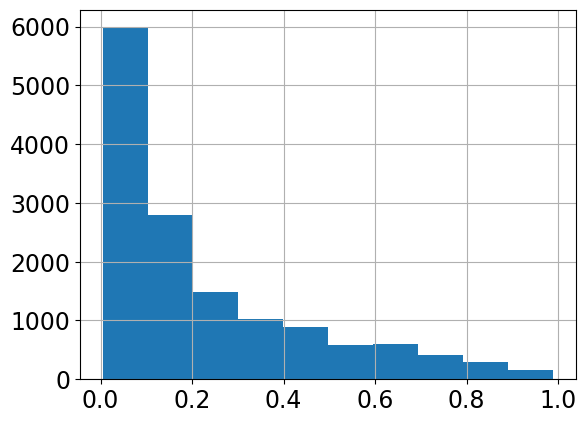

In [157]:
pd.Series(y_probc).hist()

In [158]:
gdf = x.reset_index()

In [159]:
gdf['pred'] = pd.Series(y_probc)

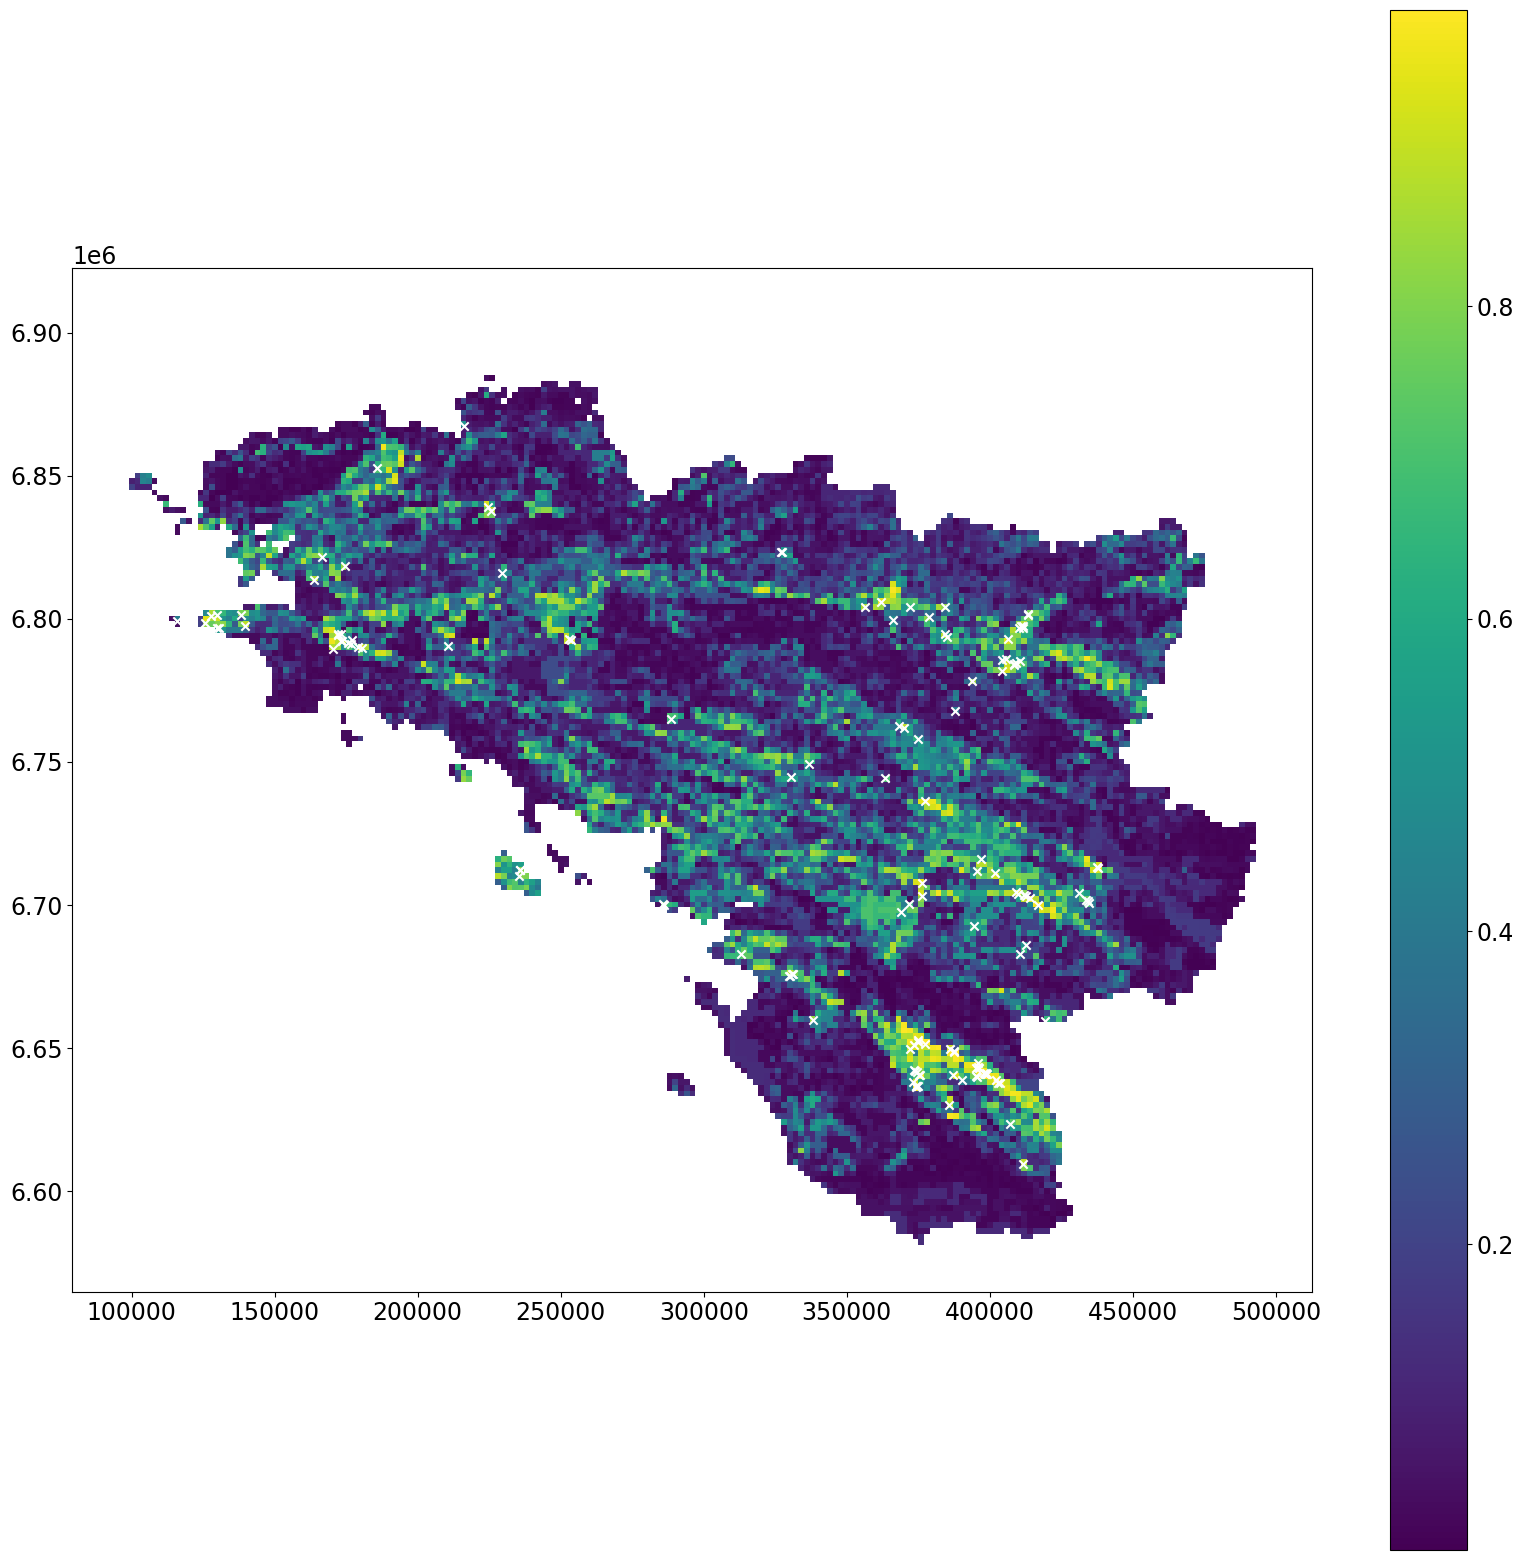

In [160]:
fig1= gdf.plot(column='pred', legend=True, figsize=(20,20))
sb.plot(ax=fig1, color='white', marker='x');